The dataset consists of ODI (One Day International) cricket match records. It includes information such as the teams involved, the match results, the margin of victory/defeat, the venue where the match was played, and the match date. The dataset covers a range of ODI matches played over the years, providing a historical perspective on international cricket. With this dataset, you can analyze various aspects of ODI cricket, including team performances, match outcomes, venue preferences, and trends over time. It can be used to explore patterns, relationships, and statistics related to ODI matches, offering valuable insights into the world of cricket.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/originalDataset.csv")

In [6]:
df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [7]:
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   3932 non-null   object
 1   Team 1      3932 non-null   object
 2   Team 2      3932 non-null   object
 3   Winner      3932 non-null   object
 4   Margin      3753 non-null   object
 5   Ground      3932 non-null   object
 6   Match Date  3932 non-null   object
dtypes: object(7)
memory usage: 215.2+ KB


In [9]:
df.isnull().sum()

Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin        179
Ground          0
Match Date      0
dtype: int64

In [10]:
df.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,3932,3932,3932,3932,3753,3932,3932
unique,3932,24,25,25,227,173,3386
top,ODI # 1,Australia,Sri Lanka,Australia,6 wickets,Sharjah,"Feb 4, 2007"
freq,1,583,508,555,347,228,6


In [11]:
# Drop rows with null values in the "Margin" column
df = df.dropna(subset=['Margin'])

# Print the updated DataFrame
print(df)


       Scorecard        Team 1       Team 2        Winner     Margin  \
0        ODI # 1     Australia      England     Australia  5 wickets   
1        ODI # 2       England    Australia       England  6 wickets   
2        ODI # 3       England    Australia     Australia  5 wickets   
3        ODI # 4       England    Australia       England  2 wickets   
4        ODI # 5   New Zealand     Pakistan   New Zealand    22 runs   
...          ...           ...          ...           ...        ...   
3927  ODI # 3928         India  New Zealand   New Zealand  6 wickets   
3928  ODI # 3929  South Africa   Bangladesh  South Africa   200 runs   
3929  ODI # 3930      Pakistan    Sri Lanka      Pakistan  9 wickets   
3930  ODI # 3931         India  New Zealand         India  6 wickets   
3931  ODI # 3932         India  New Zealand         India     6 runs   

            Ground    Match Date  
0        Melbourne   Jan 5, 1971  
1       Manchester  Aug 24, 1972  
2           Lord's  Aug 26, 19

## **1.How many matches were played by each team?**

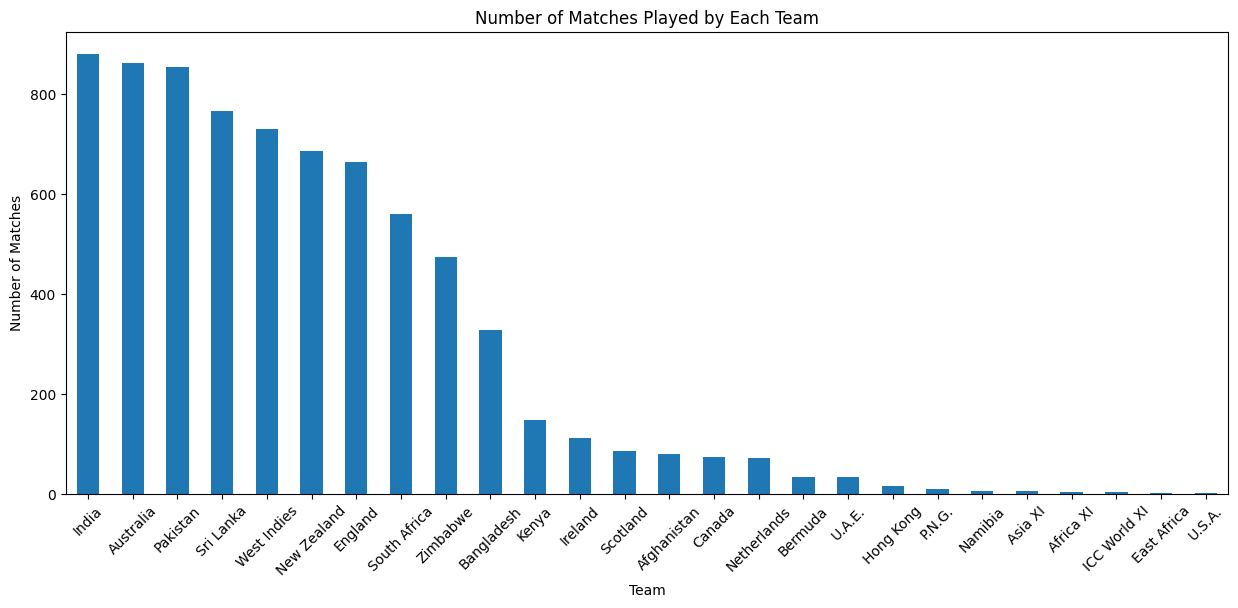

In [12]:

# Combine the team names from 'Team 1' and 'Team 2' columns
team_matches = pd.concat([df['Team 1'], df['Team 2']])

# Count the number of matches for each team
team_counts = team_matches.value_counts()

# Create a bar plot of the number of matches per team
plt.figure(figsize=(15, 6))
team_counts.plot(kind='bar')
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


## **2.What is the distribution of match results (wins/losses) for each team?**

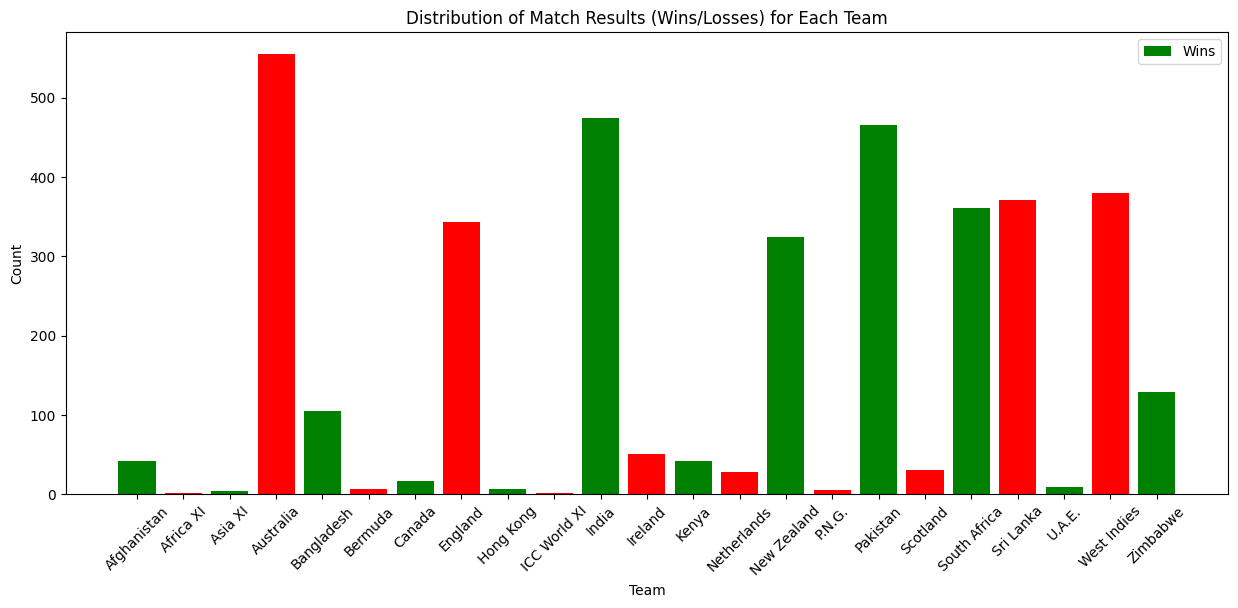

In [15]:
# Group the data by team and match result
result_counts = df.groupby(['Winner'])['Winner'].count().reset_index(name='Count')

# Plot the stacked bar chart
plt.figure(figsize=(15, 6))
plt.bar(result_counts['Winner'], result_counts['Count'], color=['green', 'red'])
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Distribution of Match Results (Wins/Losses) for Each Team')
plt.legend(['Wins', 'Losses'])
plt.xticks(rotation=45)
plt.show()

## **3.Which ground hosted the maximum number of matches?**

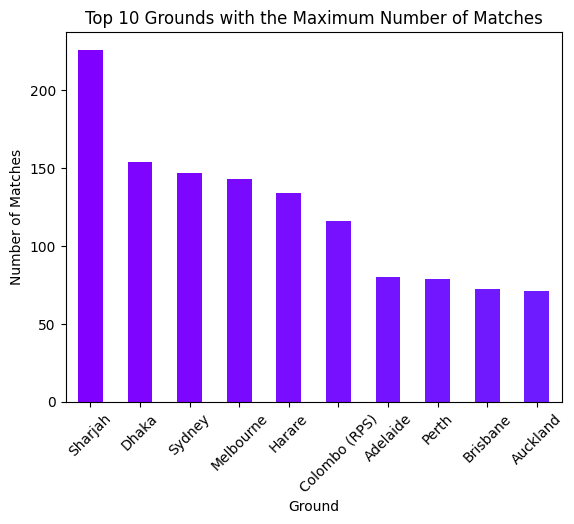

In [24]:
# Calculate the count of matches for each ground
ground_counts = df['Ground'].value_counts().nlargest(10)

# Create a colorful bar plot
colors = plt.cm.rainbow(range(len(ground_counts)))
ground_counts.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Top 10 Grounds with the Maximum Number of Matches')
plt.xlabel('Ground')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)

# Display the plot
plt.show()

## **4.Which team has the highest win percentage? **

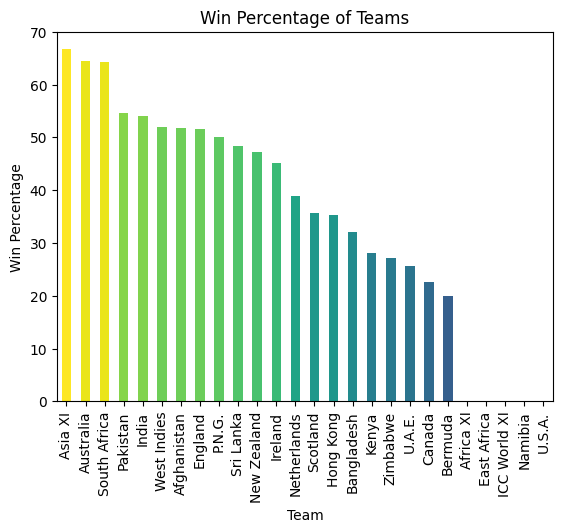

In [27]:
# Calculate the total number of matches played by each team
total_matches = df['Team 1'].value_counts() + df['Team 2'].value_counts()

# Calculate the total number of wins for each team
wins = df['Winner'].value_counts()

# Calculate the win percentage for each team
win_percentage = (wins / total_matches) * 100

# Sort the win percentages in descending order
win_percentage_sorted = win_percentage.sort_values(ascending=False)

# Plot the win percentage for each team in a colorful bar plot
colors = plt.cm.viridis(win_percentage_sorted.values / max(win_percentage_sorted.values))
win_percentage_sorted.plot(kind='bar', color=colors)

# Set the plot labels and title
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Teams')

# Show the plot
plt.show()